## **Decision Tree**

## Theory

* A decision tree is a flowchart-like structure used to make decisions or predictions.
* It systematically partitions data based on feature values to arrive at predictive outcomes.
* It operates by recursively splitting the data into subsets, each defined by specific feature thresholds, until terminal nodes—called leaves—are reached, which represent the predicted outputs. 

**How Decision Tree Works?** <br>
At a high level, Decision Trees function through a process known as recursive binary splitting (or multi-way splitting, depending on the implementation):
* Node Splitting: Starting at the root, the algorithm selects a feature and a threshold that maximizes a predefined metric (e.g., Information Gain or Gini Impurity).

* Partitioning Data: Based on the selected threshold, data is divided into subsets. Each subset becomes a child node of the current node.

* Stopping Criterion: The process continues recursively until certain conditions are met, such as a maximum depth, minimum number of samples per leaf, or zero improvement in the splitting metric.

* Leaf Assignment: Terminal nodes are assigned predicted values based on the majority class (classification) or mean/median (regression) of the samples within the node.

**Core Idea**
* Interpretability: Decision Trees are inherently interpretable. Their hierarchical structure allows us to trace the path of decisions, making them especially useful for scenarios where model transparency is critical.

* Non-linear Decision Boundaries: By partitioning data at various thresholds, Decision Trees can model complex, non-linear relationships between features and the target variable.

* Flexibility: They accommodate both categorical and continuous input features, and can adapt to various levels of complexity by adjusting their depth.

**Advantages**
* Simplicity: Decision Trees require minimal data preprocessing and are intuitive to construct.

* Explainability: The step-by-step decision-making process can be visualized and understood by stakeholders.

* Scalability: They perform well on small to medium-sized datasets and can be extended through ensembles like Random Forests.

**Disadvantage**
* Overfitting: Trees are prone to overfitting, especially when grown to large depths without pruning.

* Instability: Small changes in the data can result in significantly different tree structures.

* Bias: Trees may favor features with more levels (e.g., numerical over categorical).

## Implementation

In [5]:
import numpy as np
import pandas as pd
from sklearn import tree

In [6]:
def calculate_entropy(target):
    values, counts = np.unique(target, return_counts=True)
    probabilities = counts / len(target)
    return -np.sum(probabilities * np.log2(probabilities))

In [7]:
def information_gain(data, feature, target, threshold=None):
    total_entropy = calculate_entropy(data[target])
    
    if threshold is not None:
        left_split = data[data[feature] < threshold]
        right_split = data[data[feature] >= threshold]
    else:
        values, counts = np.unique(data[feature], return_counts=True)
        splits = [data[data[feature] == value] for value in values]
        weighted_entropy = np.sum(
            [(len(split) / len(data)) * calculate_entropy(split[target]) for split in splits]
        )
        return total_entropy - weighted_entropy
    
    # Calculate weighted entropy of the splits
    weighted_entropy = (len(left_split) / len(data)) * calculate_entropy(left_split[target]) + \
                       (len(right_split) / len(data)) * calculate_entropy(right_split[target])
    
    return total_entropy - weighted_entropy
    

In [8]:
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, data, target):
        self.target = target
        self.tree = self._build_tree(data)

    def _build_tree(self, data, depth=0):
        if len(data) < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return DecisionTreeNode(value=data[self.target].mode()[0])
        if len(np.unique(data[self.target])) == 1:
            return DecisionTreeNode(value=data[self.target].iloc[0])
        
        best_feature, best_threshold, best_gain = None, None, 0
        for feature in data.columns:
            if feature == self.target:
                continue
            unique_values = np.sort(data[feature].unique())
            thresholds = (unique_values[:-1] + unique_values[1:]) / 2
            for threshold in thresholds:
                gain = information_gain(data, feature, self.target, threshold)
                if gain > best_gain:
                    best_feature, best_threshold, best_gain = feature, threshold, gain
        

        if best_gain == 0:
            return DecisionTreeNode(value=data[self.target].mode()[0])
        
        left_split = data[data[best_feature] < best_threshold]
        right_split = data[data[best_feature] >= best_threshold]
        left_subtree = self._build_tree(left_split, depth + 1)
        right_subtree = self._build_tree(right_split, depth + 1)
        
        return DecisionTreeNode(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def predict_instance(self, instance, tree):
        if tree.value is not None:
            return tree.value
        
        if instance[tree.feature] < tree.threshold:
            return self.predict_instance(instance, tree.left)
        else:
            return self.predict_instance(instance, tree.right)

    def predict(self, data):
        return data.apply(lambda row: self.predict_instance(row, self.tree), axis=1)

data = pd.DataFrame({
    "Age": [25, 45, 35, 50, 23, 30, 40, 38, 33, 29],
    "Income": [50000, 100000, 75000, 120000, 45000, 55000, 95000, 85000, 78000, 60000],
    "Buy_Product": ["Yes", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "Yes"]
})
target = "Buy_Product"

model = DecisionTreeClassifier(min_samples_split=2, max_depth=3)
model.fit(data, target)


predictions = model.predict(data)
print(predictions)


0    Yes
1     No
2    Yes
3     No
4     No
5    Yes
6    Yes
7    Yes
8    Yes
9    Yes
dtype: object


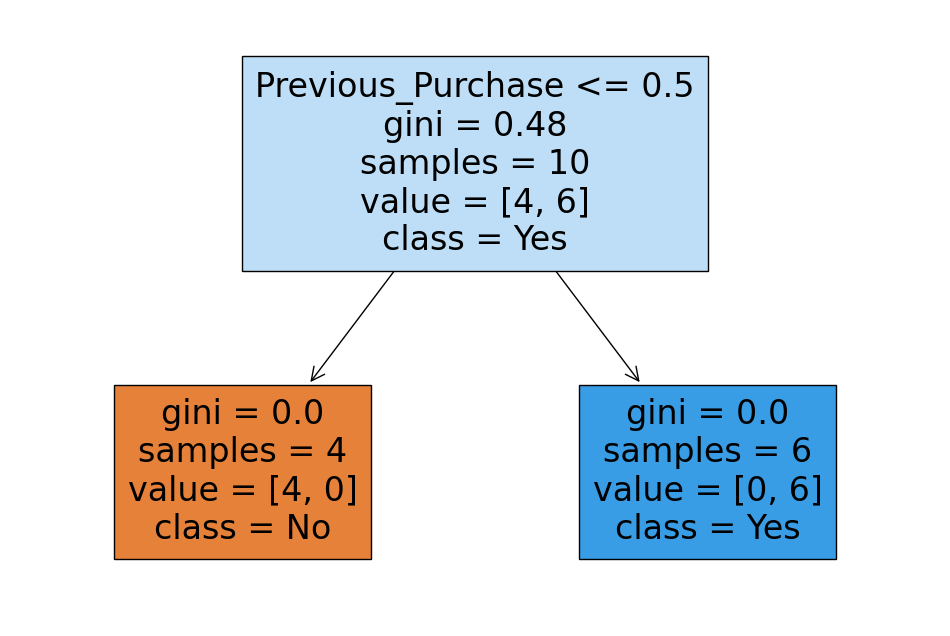

In [9]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    "Age": [25, 45, 35, 50, 23, 30, 40, 38, 33, 29],
    "Income": [50000, 100000, 75000, 120000, 45000, 55000, 95000, 85000, 78000, 60000],
    "Previous_Purchase": ["Yes", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "Yes"],
    "Buy_Product": ["Yes", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "Yes"]
})

# Convert categorical columns to numeric values
data["Previous_Purchase"] = data["Previous_Purchase"].map({"Yes": 1, "No": 0})
data["Buy_Product"] = data["Buy_Product"].map({"Yes": 1, "No": 0})

# Separate features and target
X = data[['Age', 'Income', 'Previous_Purchase']]
y = data['Buy_Product']

# Initialize and fit the DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()


In [10]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [61]:
data = load_iris()
df = pd.DataFrame(data=data.data,columns=data.feature_names)


In [65]:
df['target'] = data.target

In [66]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
X,y = data.data,data.target

In [68]:
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

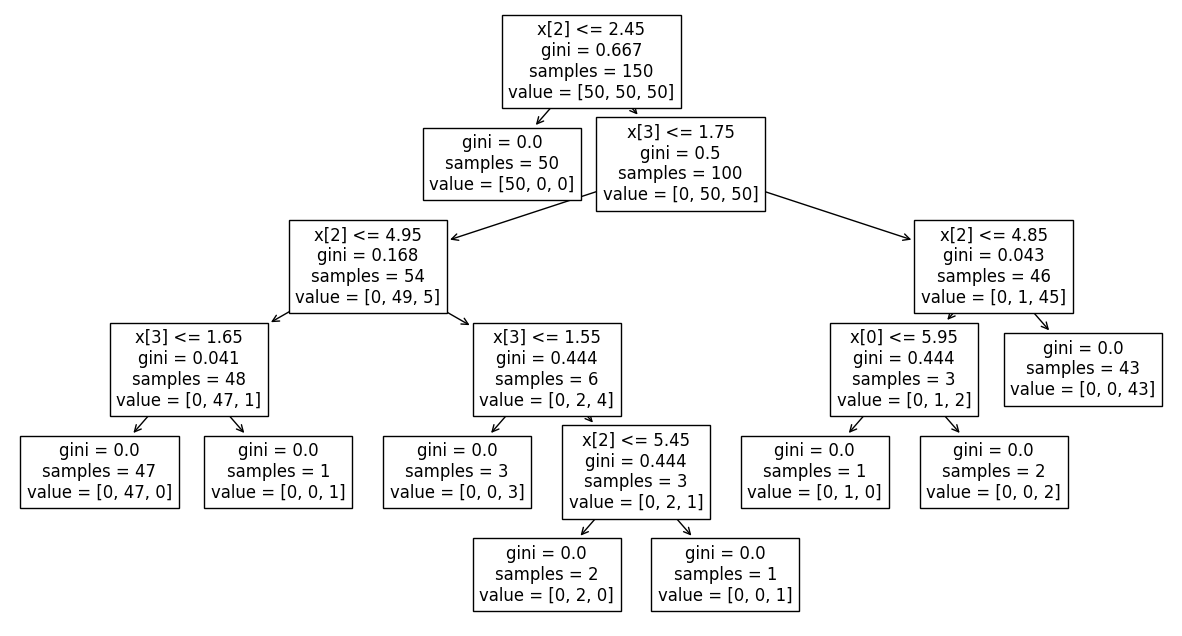

In [ ]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf)
plt.show()

In [1]:
from sklearn.linear_model import LinearRegression

In [18]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

In [17]:
linear_model = LinearRegression()
X = [[1],[2],[3],[4],[5]]
y = [[2],[4],[6],[8],[10]]
linear_model.fit(X,y)

LinearRegression()

In [15]:
linear_model.score(X,y)

1.0

In [ ]:
W * X+ b = y

In [10]:
linear_model.predict([[12]])

array([[24.]])